# ***Team name :*** 
# 1- Muhammed Tallat Hassan   18108947 
# 2- Mena Ayman Kamal   18108700 

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=784a0ff40ed4fb950395628c05a571ea843219d76f75b3624b046956513695ab
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
temperature = ctrl.Antecedent(np.arange(0,126,1), 'Temperature')
speed = ctrl.Antecedent(np.arange(0,126,1), 'Speed')
tip = ctrl.Consequent(np.arange(0,11,1),'Tip')

In [4]:
speed.automf(3)
temperature.automf(3)

In [5]:
speed['fast'] = fuzz.trimf(speed.universe, [75,100,125])
speed['very fast'] = fuzz.trimf(speed.universe, [100,125,125])
speed['very slow'] = fuzz.trimf(speed.universe, [0,0,50])
speed['slow'] = fuzz.trimf(speed.universe, [25,50,75])
speed['medium'] = fuzz.trimf(speed.universe, [50,75,100])

In [6]:
temperature['cool'] = fuzz.trimf(temperature.universe, [0,0,400])
temperature['hot'] = fuzz.trimf(temperature.universe, [500,650,650])
temperature['warm'] = fuzz.trimf(temperature.universe, [400,500,650])

In [7]:
tip['increased'] = fuzz.trimf(tip.universe, [5,10,10])
tip['decreased'] = fuzz.trimf(tip.universe, [0,0,5])
tip['unchanged'] = fuzz.trimf(tip.universe, [0,5,10])

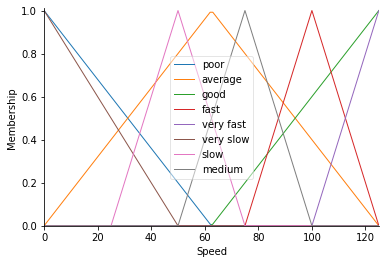

In [8]:
speed.view()

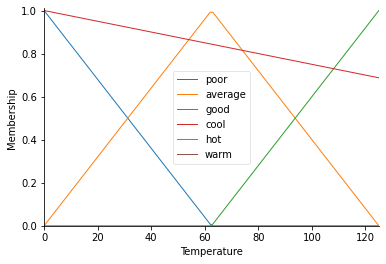

In [9]:
temperature.view()

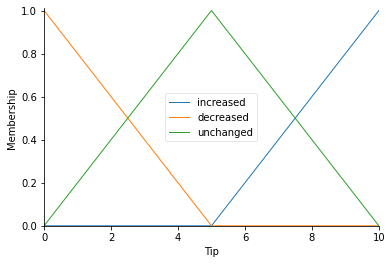

In [10]:
tip.view()

In [11]:
rule1 = ctrl.Rule((temperature['warm'] | temperature['warm']) & speed['medium'], tip['unchanged'])
rule2 = ctrl.Rule(temperature['cool'] & (speed['fast'] | speed['very fast']), tip['increased'])
rule3 = ctrl.Rule(temperature['warm'] & speed['slow'], tip['decreased'])

In [12]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])

In [13]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [14]:
tipping.input['Temperature']  = 435
tipping.input['Speed']  = 85

In [15]:
tipping.compute()

In [16]:
print(tipping.output['Tip'])

7.958333333333334


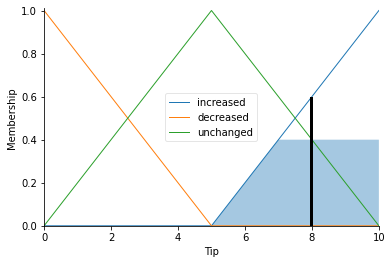

In [17]:
tip.view(sim = tipping)